
# 1. Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 2. Carregamento dos dados

In [29]:
data_path = "housing.csv"
df = pd.read_csv(data_path)

print("Primeiras linhas:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe(include="all"))

Primeiras linhas:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

# 3. Análise Exploratória de Dados (EDA)


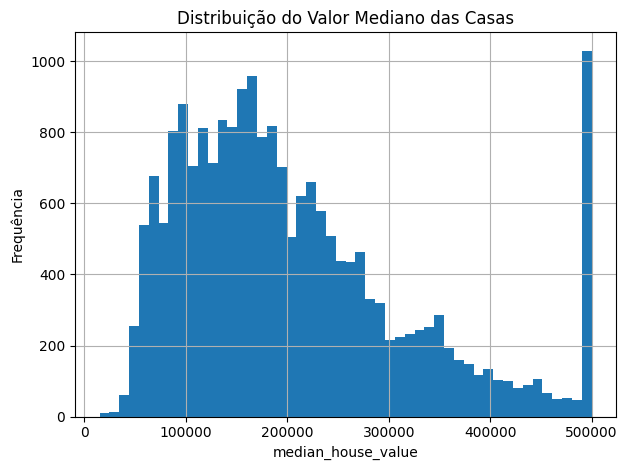

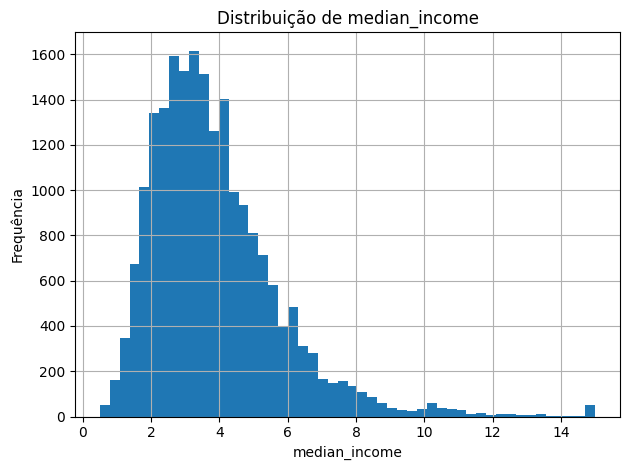

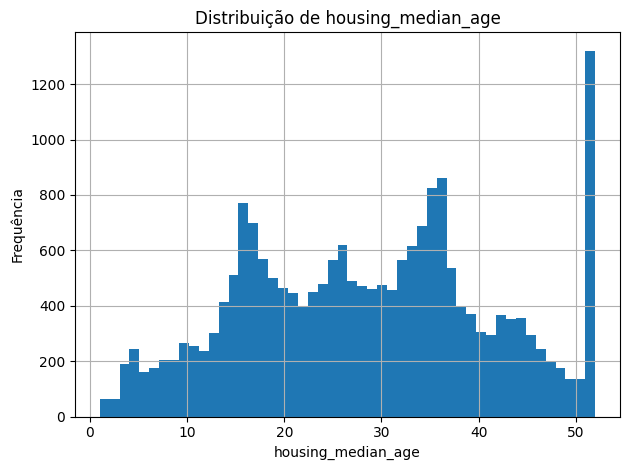

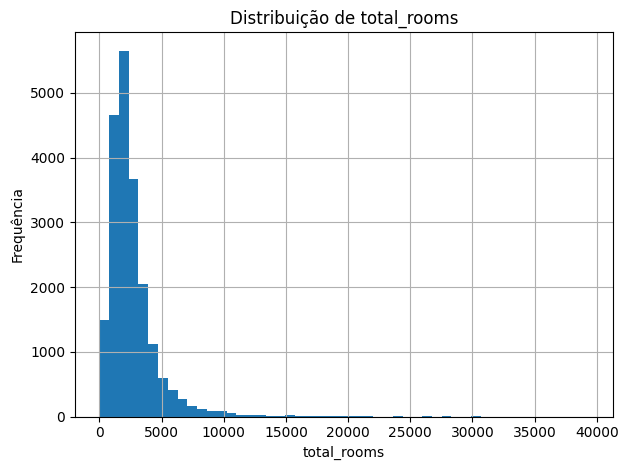

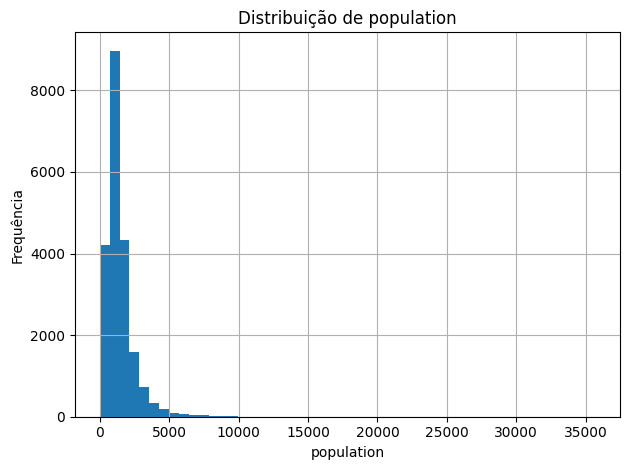

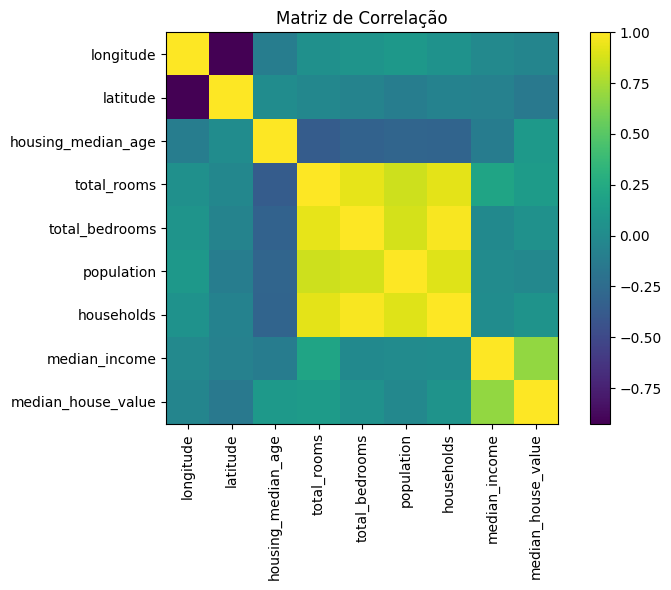

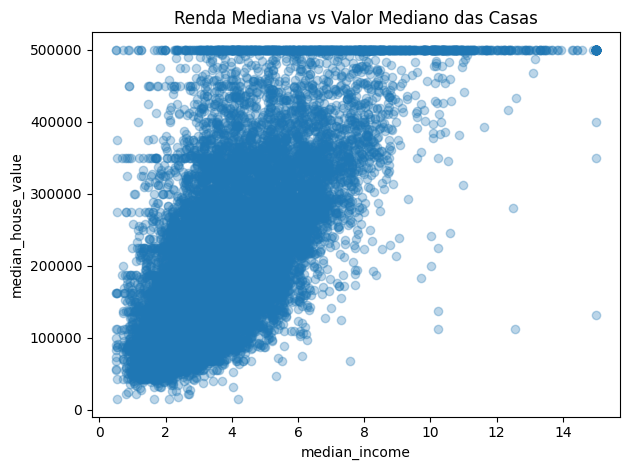

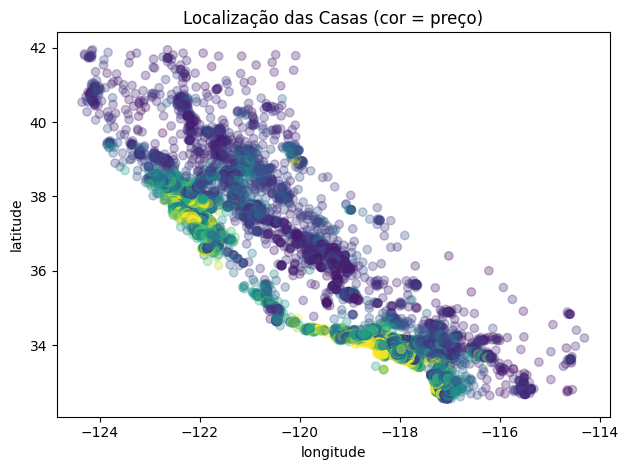

In [30]:
plt.figure()
df["median_house_value"].hist(bins=50)
plt.title("Distribuição do Valor Mediano das Casas")
plt.xlabel("median_house_value")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

cols_to_plot = ["median_income", "housing_median_age", "total_rooms", "population"]
for col in cols_to_plot:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
plt.imshow(corr, interpolation="nearest")
plt.title("Matriz de Correlação")
plt.colorbar()
tick_marks = np.arange(len(corr.columns))
plt.xticks(tick_marks, corr.columns, rotation=90)
plt.yticks(tick_marks, corr.columns)
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)
plt.title("Renda Mediana vs Valor Mediano das Casas")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["longitude"], df["latitude"],
            c=df["median_house_value"], alpha=0.3)
plt.title("Localização das Casas (cor = preço)")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()
plt.show()

# 4. Preparação dos dados para Modelagem


In [31]:
# Variável alvo (target)
y = df["median_house_value"]

# Features (removendo a coluna alvo)
X = df.drop("median_house_value", axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("\nShape de X antes do get_dummies:", X.shape)
print("Shape de X depois do get_dummies:", X_encoded.shape)
print("Colunas depois do get_dummies (todas numéricas!):")
print(X_encoded.dtypes.value_counts())

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("\nShape treino:", X_train.shape, " | Shape teste:", X_test.shape)


Shape de X antes do get_dummies: (20640, 9)
Shape de X depois do get_dummies: (20640, 12)
Colunas depois do get_dummies (todas numéricas!):
float64    8
bool       4
Name: count, dtype: int64

Shape treino: (16512, 12)  | Shape teste: (4128, 12)


# 5. Definição dos modelos

In [32]:
modelos = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

pipelines = {
    nome: Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # preenche NaNs
        ("scaler", StandardScaler()),                   # normaliza
        ("regressor", modelo)                           # modelo final
    ])
    for nome, modelo in modelos.items()
}


# 6. Treinamento e Avaliação dos Modelos


In [33]:
resultados = []

for nome, pipe in pipelines.items():
    print(f"\nTreinando modelo: {nome}...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nome,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

    print(f"Resultados {nome}:")
    print(f"  MAE  = {mae:.2f}")
    print(f"  MSE  = {mse:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R²   = {r2:.4f}")


Treinando modelo: Regressão Linear...
Resultados Regressão Linear:
  MAE  = 50670.49
  MSE  = 4908290571.35
  RMSE = 70059.19
  R²   = 0.6254

Treinando modelo: Random Forest...
Resultados Random Forest:
  MAE  = 31471.47
  MSE  = 2382459089.47
  RMSE = 48810.44
  R²   = 0.8182

Treinando modelo: Gradient Boosting...
Resultados Gradient Boosting:
  MAE  = 38276.87
  MSE  = 3125879704.30
  RMSE = 55909.57
  R²   = 0.7615


# 7. Comparação dos modelos em um DataFrame


In [34]:
resultados_df = pd.DataFrame(resultados)
print("\nComparação dos modelos:")
print(resultados_df.sort_values(by="RMSE"))


Comparação dos modelos:
              Modelo           MAE           MSE          RMSE        R2
1      Random Forest  31471.467885  2.382459e+09  48810.440374  0.818190
2  Gradient Boosting  38276.871569  3.125880e+09  55909.567198  0.761458
0   Regressão Linear  50670.489236  4.908291e+09  70059.193339  0.625438


# 8. Gráfico de análise para o melhor modelo (menor RMSE)



Melhor modelo (menor RMSE): Random Forest


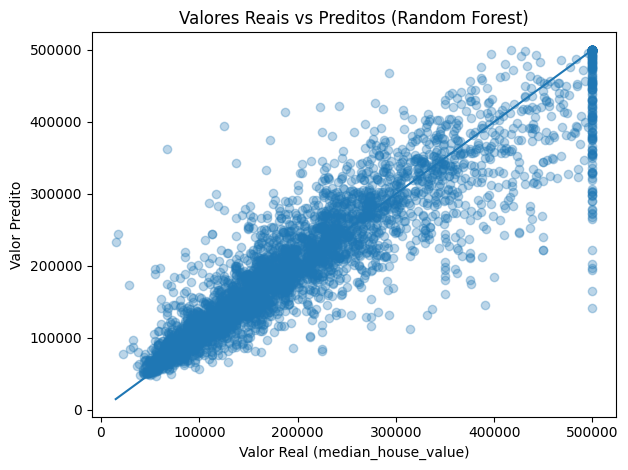

In [35]:
melhor_modelo_nome = resultados_df.sort_values(by="RMSE")["Modelo"].iloc[0]
melhor_pipeline = pipelines[melhor_modelo_nome]

print(f"\nMelhor modelo (menor RMSE): {melhor_modelo_nome}")

y_pred_best = melhor_pipeline.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.title(f"Valores Reais vs Preditos ({melhor_modelo_nome})")
plt.xlabel("Valor Real (median_house_value)")
plt.ylabel("Valor Predito")
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.tight_layout()
plt.show()